<a href="https://colab.research.google.com/github/mainthreadbabe/plaque-rupture-ai/blob/main/Plaque_Rupture_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 9 images belonging to 2 classes.
Found 2 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4410 - loss: 0.9265 - val_accuracy: 0.5000 - val_loss: 0.6383
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 744ms/step - accuracy: 0.3347 - loss: 0.9450 - val_accuracy: 0.5000 - val_loss: 0.6154
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 623ms/step - accuracy: 0.2792 - loss: 0.8404 - val_accuracy: 0.5000 - val_loss: 0.7303
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 589ms/step - accuracy: 0.5583 - loss: 0.6841 - val_accuracy: 0.5000 - val_loss: 0.7035
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 747ms/step - accuracy: 0.5583 - loss: 0.7235 - val_accuracy: 0.5000 - val_loss: 0.7089


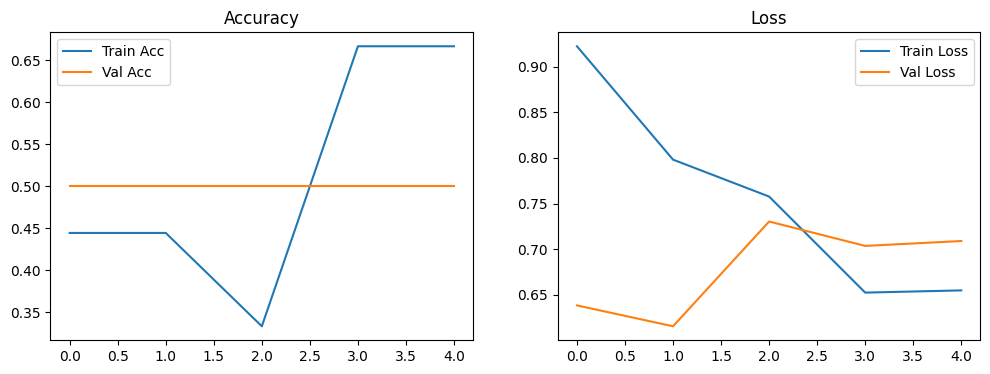

In [ ]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Set dataset path
data_dir = '/content/drive/MyDrive/plaque_dataset/'  # Change if needed

# 3. Imports
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 4. Image size and batch size
img_size = (128, 128)
batch_size = 4  # Lowered due to small dataset

# 5. Data augmentation + preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# 6. Load VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(*img_size, 3))
base_model.trainable = False  # Freeze convolution layers

# 7. Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# 8. Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 9. Add EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 10. Train model
history = model.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen,
    callbacks=[early_stop]
)

# 11. Plot accuracy and loss
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

